In [1]:
import numpy as np
import pandas as pd
import json as js
import requests as req
import matplotlib.pyplot as plt

In [80]:
league_id = 1298046
#Cookies
swid = ""
espn_s2 = ""

In [81]:
year = 2020

url = "https://fantasy.espn.com/apis/v3/games/ffl/leagueHistory/" + \
      str(league_id) + "?seasonId=" + str(year)

r = req.get(url,
            cookies={"swid": swid,
                          "espn_s2": espn_s2},
             params={"view": "mMatchup"})
d = r.json()[0]

In [82]:
df = [[
        game['matchupPeriodId'],
        game['home']['teamId'], game['home']['totalPoints'],
        game['away']['teamId'], game['away']['totalPoints']
    ] for game in d['schedule']]
df = pd.DataFrame(df, columns=['Week', 'Team1', 'Score1', 'Team2', 'Score2'])
df['Type'] = ['Regular' if w<=12 else 'Playoff' for w in df['Week']]
df['Year'] = year

In [83]:
df

,Week,Team1,Score1,Team2,Score2,Type,Year
0,1,9,93.12,3,79.70,Regular,2020
1,1,5,109.90,1,97.50,Regular,2020
2,1,6,89.30,10,97.00,Regular,2020
3,1,2,80.84,8,122.88,Regular,2020
4,1,4,123.20,7,85.94,Regular,2020
...,...,...,...,...,...,...,...
65,14,4,241.52,5,239.16,Playoff,2020
66,14,10,148.14,7,185.98,Playoff,2020
67,14,2,227.08,3,164.40,Playoff,2020
68,14,1,235.04,9,216.88,Playoff,2020


In [88]:
df = df[df['Type']=='Regular']
df_t1 = df.drop(columns=['Team2', 'Score2','Type','Year'])
df_t1 = df_t1.rename(columns={'Team1':'Team','Score1':'Score'})
df_t2 = df.drop(columns=['Team1', 'Score1','Type','Year'])
df_t2 = df_t2.rename(columns={'Team2':'Team','Score2':'Score'})

df_scores = df_t1.append(df_t2)

In [89]:
df_scores

,Week,Team,Score
0,1,9,93.12
1,1,5,109.90
2,1,6,89.30
3,1,2,80.84
4,1,4,123.20
...,...,...,...
55,12,10,93.64
56,12,1,68.00
57,12,9,85.92
58,12,5,140.24


League Info for the year

In [90]:
r = req.get(url,
            cookies={"swid": "{4815E915-6DE2-4835-91C1-18BDF96DE290}",
                          "espn_s2": "AECR%2BciKtRrlFGXFxnqZ5kFENqS2QmPqMV3tjXA1HqjSJrnP4lz%2FpszOCyZvapx8QKuLmGcy%2BrOFkUFAkz835Nkz2xIsn2CIsFClXnFHFKGMRUEjKnpXuJgjk4d7HkzeE5s3kfFh2k9xZ3U7GfGeNQLeBK6922JdK9Dw5ZirGT8IQjcjI6Ce4ACk7ubfOkfh32e9oC6%2FXC3XaspC6BhrciWQ1rlgkJFekQ4XTdact%2FVztf0ujLBdXfLsNqO4yLzEoR8%3D"},
             )
d = r.json()[0]

In [91]:
df_teams = [[
        team['abbrev'],
        team['id'],
        team['location'],
        team['nickname'],
        team['owners'][0]
    ] for team in d['teams']]


df_members = [[
        members['displayName'],
        members['id'],
        members['isLeagueManager']
    ] for members in d['members']]

In [92]:
df_teams = pd.DataFrame(df_teams,columns=['Abbrev', 'id','location', 'nickname','ownerID'])
df_teams['Year'] = year
df_teams

,Abbrev,id,location,nickname,ownerID,Year
0,ATT,1,New Jersey,Football Team,{3C056D88-BB73-48F6-856D-88BB7338F66B},2020
1,GOFF,2,Jared Goff,and the Crew,{D4B37182-E75B-4530-B371-82E75B853033},2020
2,STP,3,Trust,the Process,{C310081E-5B2C-41DC-9008-1E5B2C61DCA8},2020
3,BRRR,4,J-Pow's,Money Printer,{4815E915-6DE2-4835-91C1-18BDF96DE290},2020
4,sb52,5,Double,Doink,{FCDF22C1-1D05-4569-9F22-C11D05956935},2020
5,420,6,Drake and,Bake,{29CD9A6C-D8FB-4AEF-BF14-3953B3867E95},2020
6,JOHN,7,Smoke Mad,Herbert,{1E852F99-F321-4C5A-852F-99F3218C5AFA},2020
7,BOS,8,Boston,Champions,{13EA8912-5EB8-4A25-AA89-125EB84A256C},2020
8,CLJ,9,2 Girls,1 Kupp,{717C5306-4929-43AC-BC53-06492903AC2B},2020
9,Auto,10,Team,Auto Draft V4.2,{07BAF521-DA94-45B1-BC77-5A82B7CBD04D},2020


In [93]:
df_members = pd.DataFrame(df_members,columns=['Display Name', 'id','isLeagueManager'])
df_members

,Display Name,id,isLeagueManager
0,joomah9748414,{07BAF521-DA94-45B1-BC77-5A82B7CBD04D},False
1,Peterjtr,{13EA8912-5EB8-4A25-AA89-125EB84A256C},False
2,314johnvi,{1E852F99-F321-4C5A-852F-99F3218C5AFA},False
3,andrew2471506,{29CD9A6C-D8FB-4AEF-BF14-3953B3867E95},False
4,Timothy Geraghty,{3C056D88-BB73-48F6-856D-88BB7338F66B},False
5,agthain,{4815E915-6DE2-4835-91C1-18BDF96DE290},False
6,Clement0041,{717C5306-4929-43AC-BC53-06492903AC2B},False
7,STP907,{C310081E-5B2C-41DC-9008-1E5B2C61DCA8},False
8,Scstephen,{D4B37182-E75B-4530-B371-82E75B853033},False
9,BG Reynolds,{FCDF22C1-1D05-4569-9F22-C11D05956935},False


In [94]:
df_scores['Team #'] = df_scores['Team']
df_scores = df_scores.set_index('Team').join(df_teams.set_index('id'))
df_scores = df_scores.set_index('ownerID').join(df_members.set_index('id'))
df_scores = df_scores.reset_index()
df_t1 = df_t1.rename(columns={'index':'ownerId'})
df_scores

,index,Week,Score,Team #,Abbrev,location,nickname,Year,Display Name,isLeagueManager
0,{07BAF521-DA94-45B1-BC77-5A82B7CBD04D},2,109.48,10,Auto,Team,Auto Draft V4.2,2020,joomah9748414,False
1,{07BAF521-DA94-45B1-BC77-5A82B7CBD04D},3,89.58,10,Auto,Team,Auto Draft V4.2,2020,joomah9748414,False
2,{07BAF521-DA94-45B1-BC77-5A82B7CBD04D},5,107.94,10,Auto,Team,Auto Draft V4.2,2020,joomah9748414,False
3,{07BAF521-DA94-45B1-BC77-5A82B7CBD04D},7,82.88,10,Auto,Team,Auto Draft V4.2,2020,joomah9748414,False
4,{07BAF521-DA94-45B1-BC77-5A82B7CBD04D},8,78.00,10,Auto,Team,Auto Draft V4.2,2020,joomah9748414,False
...,...,...,...,...,...,...,...,...,...,...
115,{FCDF22C1-1D05-4569-9F22-C11D05956935},4,97.28,5,sb52,Double,Doink,2020,BG Reynolds,False
116,{FCDF22C1-1D05-4569-9F22-C11D05956935},5,71.64,5,sb52,Double,Doink,2020,BG Reynolds,False
117,{FCDF22C1-1D05-4569-9F22-C11D05956935},7,127.32,5,sb52,Double,Doink,2020,BG Reynolds,False
118,{FCDF22C1-1D05-4569-9F22-C11D05956935},10,89.20,5,sb52,Double,Doink,2020,BG Reynolds,False


In [110]:
sort_df = df_scores
sort_df = sort_df.drop(columns=['index', 'Week','Abbrev','location','nickname','Year','Display Name','isLeagueManager'])
sort_df = sort_df.drop_duplicates().groupby('Team #', sort=False, as_index=False).median()
sort_df = sort_df.sort_values(by='Score',ascending=False)
sort_df

,Team #,Score
2,7,114.94
5,4,110.90
8,2,110.25
9,5,106.46
6,9,99.29
1,8,96.96
4,1,94.69
0,10,91.61
7,3,90.92
3,6,80.06


In [111]:
df_plot = pd.DataFrame()

for t in sort_df['Team #']:
    tm = list(df_scores[df_scores['Team #']==t]['Display Name'])[0]
    scores = list(df_scores[df_scores['Team #']==t]['Score'])
       
    df_temp = pd.DataFrame({tm:scores})
    
    df_plot[tm] = df_temp[tm]
    
    

df_plot

,314johnvi,agthain,Scstephen,BG Reynolds,Clement0041,Peterjtr,Timothy Geraghty,joomah9748414,STP907,andrew2471506
0,162.80,123.20,80.84,109.90,93.12,80.82,68.18,109.48,133.58,89.30
1,121.18,141.24,70.04,103.02,104.16,105.10,93.92,89.58,120.40,71.34
2,112.84,97.22,132.90,82.60,60.86,114.82,55.96,107.94,59.18,90.74
3,109.98,98.80,116.04,115.14,115.50,88.82,95.46,82.88,107.06,100.22
4,118.94,80.72,81.38,113.10,70.64,65.20,103.96,78.00,82.52,97.56
5,97.98,111.40,111.42,110.34,102.06,122.88,97.50,70.46,88.50,72.64
6,89.54,123.20,131.58,87.50,117.00,106.70,66.16,97.00,79.70,74.48
7,85.94,118.90,109.08,97.28,121.70,113.40,98.02,121.34,97.70,117.60
8,145.38,86.62,113.60,71.64,98.66,60.14,134.38,84.32,107.16,58.22
9,77.94,80.74,119.20,127.32,83.94,66.24,75.18,93.96,75.42,84.42


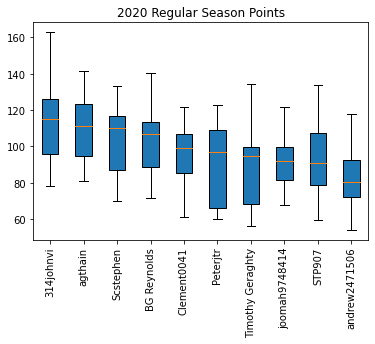

In [112]:
all_data = df_plot

fig1, ax = plt.subplots()

bplot = ax.boxplot(all_data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=list(df_plot.columns.values))  # will be used to label x-ticks
ax.set_title(str(year)+' Regular Season Points')

colors = ['pink', 'lightblue', 'lightgreen']
#for bplot in (bplot1):
#    for patch, color in zip(bplot['boxes'], colors):
#        patch.set_facecolor(color)

plt.xticks(rotation=90)

plt.show()